<h3 style="text-align: center;">Statistics & Linear Model Lab1</h3>
<h4 style="text-align: center;">Wenjie Hu</h4>
<h4 style="text-align: center;">27/10/2023</h4>


![alt text](./imgs/ex1.jpg)


### EX1

In [1]:
Num_samples = 50
Num_exp = 10000

In [2]:
get_estimators <- function(ns) {
  t1 <- mean(ns)
  t2 <- median(ns)
  
  ws <- sample(1:50, Num_samples, replace = TRUE)
  ws <- ws / sum(ws)
  t3 <- sum(ns * ws)

  a <- 0:Num_samples/Num_samples
  w <- dnorm(qnorm(a[-Num_samples])) - dnorm(qnorm(a[-1]))
  t4 <- sum(w*sort(ns))
  return(c(t1, t2, t3, t4))
}

In [3]:
estimators <- c('t1', 't2', 't3', 't4')
params <- list(c(1, 1), c(4, 1), c(1, 2))

In [4]:
summary_1 <- array(0, dim = c(length(params), 4, 3))
for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  results <- matrix(0, nrow = 4, ncol = Num_exp)
  for (j in 1:Num_exp) {
    samples <- rnorm(Num_samples, mean = theta, sd = sigma)
    est <- get_estimators(samples)
    results[, j] <- est
  }
  cat("theta:", theta, ", sigma:", sigma, "\n")
  for (j in 1:4) {
    var <- var(results[j, ])
    mse <- mean((results[j, ] - rep(theta,Num_exp))^2)
    bias <- mean(results[j, ] - rep(theta, Num_exp))
    summary_1[i, j, ] <- c(var, mse, bias)
  }
}

theta: 1 , sigma: 1 
theta: 4 , sigma: 1 
theta: 1 , sigma: 2 


In [5]:
for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  cat("Theta", theta, "Sigma", sigma, "\n")
  cat("Var:", summary_1[i, , 1], "\n")
  cat("MSE:", summary_1[i, , 2], "\n")
  cat("Bias:", summary_1[i, , 3], "\n")
}

Theta 1 Sigma 1 
Var: 0.02017153 0.02988573 0.02665801 0.008203822 
MSE: 0.02017017 0.02988413 0.02665659 0.04244672 
Bias: 0.0008075309 0.001179866 0.001117347 -0.1850506 
Theta 4 Sigma 1 
Var: 0.02007604 0.03112609 0.02646603 0.007909539 
MSE: 0.02007546 0.03112845 0.02646546 11.10325 
Bias: -0.001193716 -0.002338718 -0.001442015 -3.330967 
Theta 1 Sigma 2 
Var: 0.08062287 0.1208505 0.1060608 0.03219339 
MSE: 0.0806788 0.1209752 0.1061492 0.4884485 
Bias: 0.007999516 0.01169575 0.009947302 0.675469 


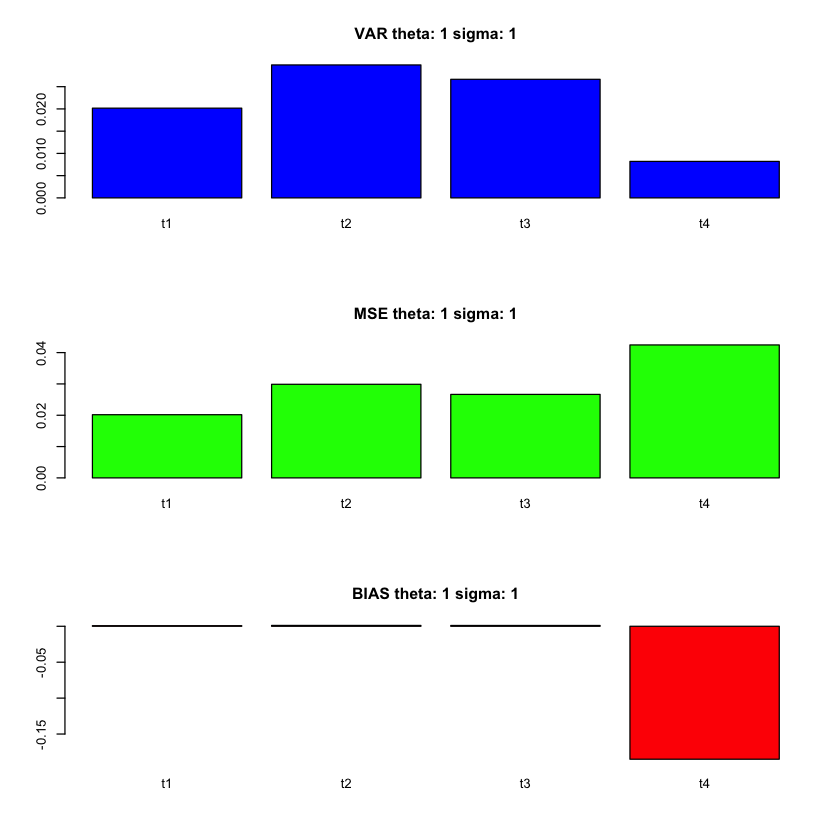

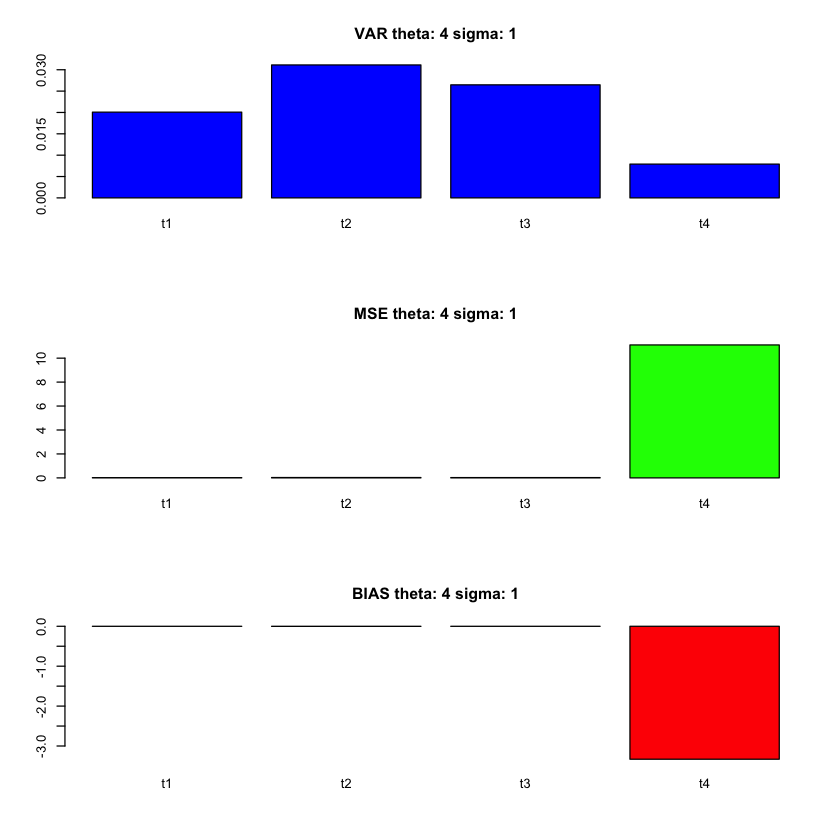

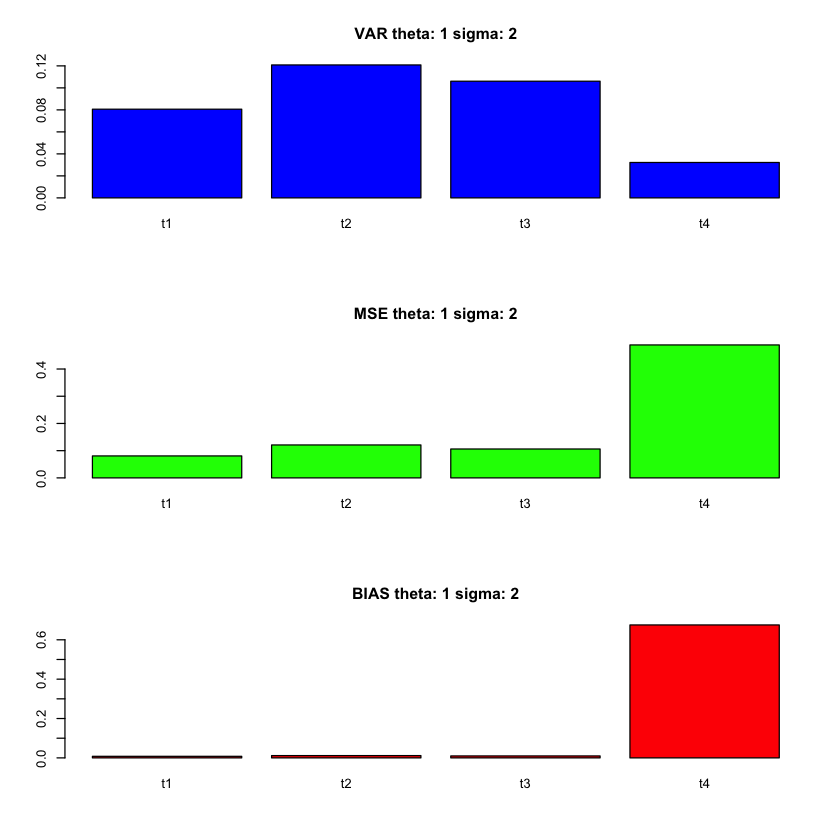

In [6]:
for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  par(mfrow = c(3, 1))
  barplot(summary_1[i, , 1], names.arg = estimators, main = paste("VAR", 
  "theta:", theta, "sigma:", sigma), col = "blue")
  barplot(summary_1[i, , 2], names.arg = estimators, main = paste("MSE", 
  "theta:", theta, "sigma:", sigma), col = "green")
  barplot(summary_1[i, , 3], names.arg = estimators, main = paste("BIAS", 
  "theta:", theta, "sigma:", sigma), col = "red")
}

Conlusion based on the results:  
- a) n = 50, $\theta$ = 1, $\sigma$ = 1  
    Since we performed 10,000 experiments, the variance of all estimates is very small, where $\bar{\theta}{_1}$ has the smaller MSE and bias, because it is the true estimator. But $\bar{\theta}{_2}$ will not change if we subtract or add a large number to the smallest or the largest observation, because we took the median observation. The $\bar{\theta}{_3}$ is very dependent on weights, so it has a similar value as the previous two estimators. The $\bar{\theta}{_4}$ has quite large MSE and the biggest bias, as we were drawing from N(0,1) distribution.
- b) n = 50, $\theta$ = 4, $\sigma$ = 1  
    In this case, we did change the number of experiments, so all the variances remain in a small number. $\bar{\theta}{_1}$ still has the best performance as it is the true estimator. However, we can observe that MSE for $\bar{\theta}{_4}$ dramatically increased compared to other estimators, as well as explained that the bisa goes to -3.3 for $\bar{\theta}{_4}$.
- c) n = 50, $\theta$ = 1, $\sigma$ = 2  
    This case is similar to parameter a but we can observe a bigger variances, which also means a bigger standard deviation. Due the large $\sigma$, the MSE for $\bar{\theta}{_1}$ ~ $\bar{\theta}{_4}$ are all increased.

------------

![alt text](./imgs/ex2.jpg)

### EX2

set.seed() is used to set a random number seed. A specific seed can generate a specific pseudo-random sequence. The main purpose of this function is to make our simulation repeatable, because many times we need to take random numbers, but when this code is run again, the result will be different. If the same simulation result needs to appear repeatedly, you can use set.seed(). In another wrod, when debugging a program or making a presentation, the repeatability of results is very important, so a random number seed is necessary.

-----

![ex3](./imgs/ex3.jpg)

### EX3

In some situations, it's not always possible to compute the solution for the optimal likelihood estimator directly. Even when we can theoretically show that a solution exists, determining the exact solution may be extremely challenging or even unattainable.

In such cases, numerical methods come to the rescue. These methods help us discover the global maximum of the likelihood function. One practical scenario where numerical methods become essential is when estimating the shifted parameter in the logistic distribution.

----

![ex4](./imgs/ex4.jpg)

### EX4

Newton's method is used to find the root of a function when we have an initial guess. We iteratively refine this guess by using the function's derivative to determine a new, closer estimate of the root. This process continues until a satisfactory approximation is reached or a predefined number of steps is completed. It's a powerful numerical technique for solving complex equations when an exact solution is difficult to find.

---

![ex5](./imgs/ex5.jpg)

### EX5

In [7]:
Num_sample = 50
Num_exp <- 10000

params <- list(c(1, 1), c(4, 1), c(1, 2))
summary_5 <- array(0, dim = c(length(params), 3))

In [8]:
log_likelihood <- function(theta, data) {
  Num_sample <- length(data)
  log_lik <- -Num_sample * log(4 * sigma) - 
    sum(log(sech((data - theta) / (2 * sigma))^2))
  return(log_lik)
}

In [13]:
for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  cat("theta:",theta,"sigma:",sigma, "\n")
  data <- rlogis(Num_sample, location = theta, scale = sigma)
  sech <- function(x) 1/cosh(x)

  initial_guess <- 0.5
  mle_estimation <- optim(par = initial_guess, fn = log_likelihood, data = data,
                                                           method = "BFGS")$par
  mle_estimations <- numeric(Num_exp)
  cat("MLE:", mle_estimation, "\n")
  for (j in 1:Num_exp) {
    data <- rlogis(Num_sample, location = theta, scale = sigma)
    mle_estimations[j] <- optim(par = 0, fn = log_likelihood, 
                            data = data, method = "BFGS")$par
  }

  variance <- var(mle_estimations)
  mse <- mean((mle_estimations - theta)^2)
  bias <- mean(mle_estimations - theta)
  summary_5[i,] <- c(variance, mse, bias)
  summary(mle_estimations)

  cat("Var:", variance, "\n")
  cat("MSE:", mse, "\n")
  cat("Bias:", bias, "\n\n")
}


theta: 1 sigma: 1 
MLE: 1.017506 
Var: 0.06057429 
MSE: 0.06056877 
Bias: 0.0007292866 

theta: 4 sigma: 1 
MLE: 3.911536 
Var: 0.06191575 
MSE: 0.06191059 
Bias: -0.001014175 

theta: 1 sigma: 2 
MLE: 1.585866 
Var: 0.2361066 
MSE: 0.2360902 
Bias: -0.002688476 



In this task, we generated $n$ observations from a logistic distribution $L$($\theta,\sigma$) with shift parameter $\theta$ and scale parameter $\sigma$. The Logistic distribution is a continuous distribution defined by its position and scale parameters. The shape of the Logistic distribution is similar to that of the Normal distribution, but the tails of the Logistic distribution are longer.    
Back to the experiments, we set 0.5 as the initial starting point and use BFGS method for the optimization. As we can see the result that the algorithm is able to find an MLE value that is very close to the true $\theta$ value, especially in the case where $\theta$=4, $\sigma$=1, the estimator is asymptotically unbiased, therefore, their variable and MSE are very close each other, similarly for another two cases.

---

### EX6

![ex6](./imgs/ex6.jpg)

In [41]:
Num_sample = 50
Num_exp <- 10000

params <- list(c(1, 1), c(4, 1), c(1, 2))
summary_6 <- array(0, dim = c(length(params), 3))

In [42]:
cauchy_log_likelihood <- function(theta, data_cauchy) {
  return(-sum(log(1 / (pi * sigma * (1 + ((data_cauchy - theta) / sigma)^2)))))
}

In [56]:
for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  cat("theta:",theta,"sigma:",sigma, "\n")
  data_cauchy <- rcauchy(Num_sample, location = theta, scale = sigma)
  initial_guess <- 0.5
  mle_estimation_cauchy <- optim(par = initial_guess, fn = cauchy_log_likelihood,
                                           data = data_cauchy, method = "BFGS")$par
  mle_estimations_cauchy <- numeric(Num_exp)
  cat("MLE:", mle_estimation_cauchy, "\n")
  for (j in 1:Num_exp) {
    data_cauchy <- rlogis(Num_sample, location = theta, scale = sigma)
    mle_estimations_cauchy[j] <- optim(par = 0, fn = cauchy_log_likelihood, 
                                            data = data_cauchy, method = "BFGS")$par
  }

  variance <- var(mle_estimations_cauchy)
  mse <- mean((mle_estimations_cauchy - theta)^2)
  bias <- mean(mle_estimations_cauchy - theta)
  summary_6[i,] <- c(variance, mse, bias)
  summary(mle_estimations_cauchy)

  cat("Var:", variance, "\n")
  cat("MSE:", mse, "\n")
  cat("Bias:", bias, "\n\n")
}


theta: 1 sigma: 1 
MLE: 1.114684 
Var: 0.08108738 
MSE: 0.08107944 
Bias: 0.0004089437 

theta: 4 sigma: 1 
MLE: 4.107032 
Var: 0.08287886 
MSE: 0.08287071 
Bias: 0.0003696135 

theta: 1 sigma: 2 
MLE: 1.017335 
Var: 0.3304939 
MSE: 0.3304639 
Bias: -0.001733184 



For the task 6 we repeat the same experiment as task 5 but for the Cauchy distribution $C(\theta,\sigma)$, which is also a continuous probability distribution, the probability density function is : $f(x|\theta, \sigma) = \frac{1}{\pi \sigma \left[1 + \left(\frac{x - \theta}{\sigma}\right)^2\right]}$  
The result of this task was as expected the true value of $\theta$ was found, and it was unbiased(with a low bias, MSE and variance). For the starting point, also know as the initial guess, we modify the initial guess as observe that the choice of the starting point can affect which local optimum the algorithm converges to, and it can influence the speed at which the optimization algorithm converges to an optimum.

---

### EX7

![ex7](./imgs/ex7.jpg)

In [17]:
cat("N = 20\n\n")

for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  cat("Theta =", theta, "Sigma =", sigma, "\n")
  cat("EX1\n")
  cat("Var:", summary_1[i, , 1], "\n")
  cat("MSE:", summary_1[i, , 2], "\n")
  cat("Bias:", summary_1[i, , 3], "\n")

  cat("EX5\n")
  cat("Var:", summary_5[i, 1], "\n")
  cat("MSE:", summary_5[i, 2], "\n")
  cat("Bias:", summary_5[i, 3], "\n")

  cat("EX6\n")
  cat("Var:", summary_6[i, 1], "\n")
  cat("MSE:", summary_6[i, 2], "\n")
  cat("Bias:", summary_6[i, 3], "\n\n")
}


N = 20

Theta = 1 Sigma = 1 
EX1
Var: 0.04911752 0.07251762 0.06477722 0.01673423 
MSE: 0.0491206 0.07251289 0.06477253 0.1491696 
Bias: -0.002826377 -0.001587797 -0.001339146 -0.363919 
EX5
Var: 0.1545209 
MSE: 0.1545057 
Bias: -0.0004710472 
EX6
Var: 0.2097589 
MSE: 0.2097439 
Bias: -0.002436469 

Theta = 4 Sigma = 1 
EX1
Var: 0.04890657 0.0727088 0.06315661 0.01653913 
MSE: 0.04890699 0.07270404 0.06316 13.53016 
Bias: 0.002304334 0.001584206 0.003116485 -3.676088 
EX5
Var: 0.1542568 
MSE: 0.1542422 
Bias: -0.0009354643 
EX6
Var: 0.2100334 
MSE: 0.2100163 
Bias: 0.001970132 

Theta = 1 Sigma = 2 
EX1
Var: 0.2000074 0.2948066 0.2630337 0.06591003 
MSE: 0.2001346 0.2950155 0.2631745 0.2097279 
Bias: -0.01213216 -0.01543918 -0.01292582 0.379242 
EX5
Var: 0.6213241 
MSE: 0.6213255 
Bias: 0.007970004 
EX6
Var: 0.8282368 
MSE: 0.8281708 
Bias: -0.004095442 



In [31]:
cat("N = 100\n\n")

for (i in 1:length(params)) {
  theta <- params[[i]][1]
  sigma <- params[[i]][2]
  cat("Theta =", theta, "Sigma =", sigma, "\n")
  cat("EX1\n")
  cat("Var:", summary_1[i, , 1], "\n")
  cat("MSE:", summary_1[i, , 2], "\n")
  cat("Bias:", summary_1[i, , 3], "\n")

  cat("EX5\n")
  cat("Var:", summary_5[i, 1], "\n")
  cat("MSE:", summary_5[i, 2], "\n")
  cat("Bias:", summary_5[i, 3], "\n")

  cat("EX6\n")
  cat("Var:", summary_6[i, 1], "\n")
  cat("MSE:", summary_6[i, 2], "\n")
  cat("Bias:", summary_6[i, 3], "\n\n")
}


N = 100

Theta = 1 Sigma = 1 
EX1
Var: 0.01008102 0.01561751 0.01339719 0.00450296 
MSE: 0.01008034 0.01561632 0.01339612 0.0161396 
Bias: 0.0005724008 0.0006047215 0.0005171646 -0.1078753 
EX5
Var: 0.02973702 
MSE: 0.02973489 
Bias: 0.0009187956 
EX6
Var: 0.04049636 
MSE: 0.04050366 
Bias: -0.003369039 

Theta = 4 Sigma = 1 
EX1
Var: 0.009957875 0.01525399 0.01329665 0.004325975 
MSE: 0.00995752 0.01525332 0.0132967 10.17415 
Bias: -0.0008005098 -0.0009266514 -0.001173058 -3.189016 
EX5
Var: 0.02992494 
MSE: 0.02992723 
Bias: 0.002297429 
EX6
Var: 0.04145686 
MSE: 0.04145293 
Bias: 0.0004639179 

Theta = 1 Sigma = 2 
EX1
Var: 0.03949869 0.06139669 0.05252934 0.01744888 
MSE: 0.03950374 0.06139066 0.05254756 0.6714303 
Bias: 0.003000689 0.0003355665 0.004844055 0.8086922 
EX5
Var: 0.118913 
MSE: 0.1189201 
Bias: 0.00435545 
EX6
Var: 0.1646469 
MSE: 0.1646837 
Bias: 0.007297299 



Here we repeat the experiment for tasks 1, 5 and 6, but we set $n$ = 20 and $n$ = 100.  
The results are not surprising. In the case of $n$ = 20, the variance, MSE and bias are higher compared to the previous experiment with $n$ = 50, the opposite is true when $n$ = 100, the results are lower than $n$ = 50.  
This is explainable, larger sample sizes result in more precise estimates, reduce biases in estimation, and the sampling distribution tends to become more normally distributed.